<a href="https://colab.research.google.com/github/abyanrizz/Midterm_MLDL/blob/main/02.Regresion/Middterm2_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q gdown
!gdown --folder 1Gch-kDaIh_4j4sEaO4HzOIhBq4Ni9GhE?hl=id

Retrieving folder contents
Processing file 1fq9eFJM0Zb9U0CZGodCMN-lnwwB_z5Mf midterm-regresi-dataset.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1fq9eFJM0Zb9U0CZGodCMN-lnwwB_z5Mf
From (redirected): https://drive.google.com/uc?id=1fq9eFJM0Zb9U0CZGodCMN-lnwwB_z5Mf&confirm=t&uuid=3e7f74be-e3e5-48a9-840d-aab63891dcf2
To: /content/Middterm2/midterm-regresi-dataset.csv
100% 443M/443M [00:03<00:00, 122MB/s]
Download completed


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

df = pd.read_csv('/content/Middterm2/midterm-regresi-dataset.csv')
display(df.head())

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [ ]:
df = pd.read_csv('/content/Middterm2/midterm-regresi-dataset.csv')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  float64
 19  32

None

In [ ]:
import pandas as pd

# The first column is the target (y) and the rest are features (X)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Since no imputation has been performed, X_imputed is simply X
X_imputed = X.copy()

# Apply the user's code
valid_target_mask = ~y.isna()
X_clean = X_imputed[valid_target_mask]
y_clean = y[valid_target_mask]

print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")
print(f"Cleaned X shape: {X_clean.shape}")
print(f"Cleaned y shape: {y_clean.shape}")

# You can also verify that valid_target_mask contains all True values
print(f"Percentage of non-NaN target values: {valid_target_mask.sum() / len(valid_target_mask) * 100:.2f}%")

Original X shape: (515344, 90)
Original y shape: (515344,)
Cleaned X shape: (515344, 90)
Cleaned y shape: (515344,)
Percentage of non-NaN target values: 100.00%


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

print(f"Shape of X_scaled: {X_scaled.shape}")

Shape of X_scaled: (515344, 90)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (412275, 90)
X_test shape: (103069, 90)
y_train shape: (412275,)
y_test shape: (103069,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],)), # Changed input_shape to dynamically match X_train features
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.05),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.05),

    Dense(128),
    LeakyReLU(),

    Dense(64),
    LeakyReLU(),

    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='huber'
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 512)            │        46,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,209 (868.00 KB)

 Trainable params: 220,673 (862.00 KB)

 Non-trainable params: 1,536 (6.00 KB)

Epoch 1/200
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - loss: 219.2473 - val_loss: 26.6912 - learning_rate: 5.0000e-04
Epoch 2/200
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - loss: 42.2109 - val_loss: 18.1814 - learning_rate: 5.0000e-04
Epoch 3/200
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 77s 8ms/step - loss: 30.9548 - val_loss: 8.8381 - learning_rate: 5.0000e-04
Epoch 4/200
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - loss: 26.0527 - val_loss: 8.2728 - learning_rate: 5.0000e-04
Epoch 5/200
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - loss: 23.5587 - val_loss: 13.2319 - learning_rate: 5.0000e-04
Epoch 6/200
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 76s 7ms/step - loss: 21.9196 - val_loss: 8.0977 - learning_rate: 5.0000e-04
Epoch 7/200
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - loss: 20.5625 - val_loss: 11.1584 - learning_rate: 5.0000e-04
Epoch 8/200
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - loss: 18.9780 - val_loss: 10.5239 - learning_rate: 5.0000e-04
Epoch 9/200
10307/10307 ━━

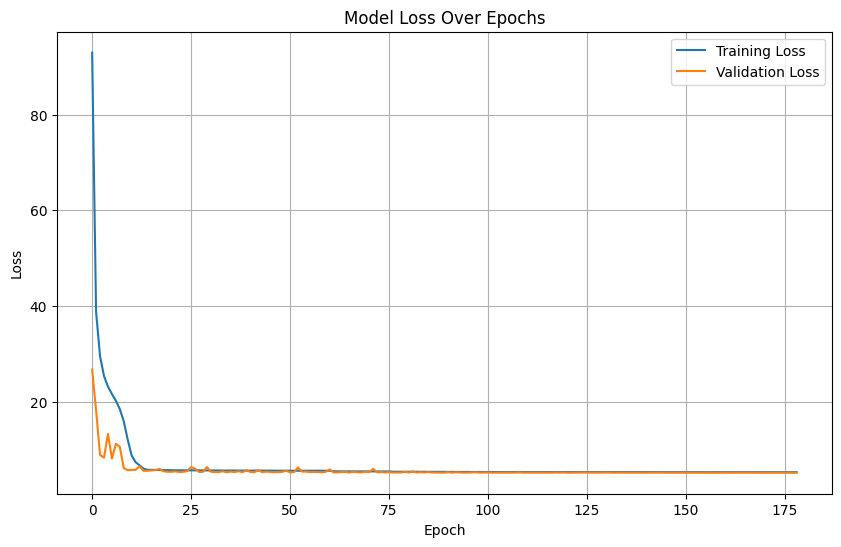

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# CALLBACKS
es = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=10,
    factor=0.5,
    min_lr=1e-6,
    verbose=1
)

# FIT MODEL
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es, lr],
    verbose=1
)

print("Training finished.")

# PLOT LOSS
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


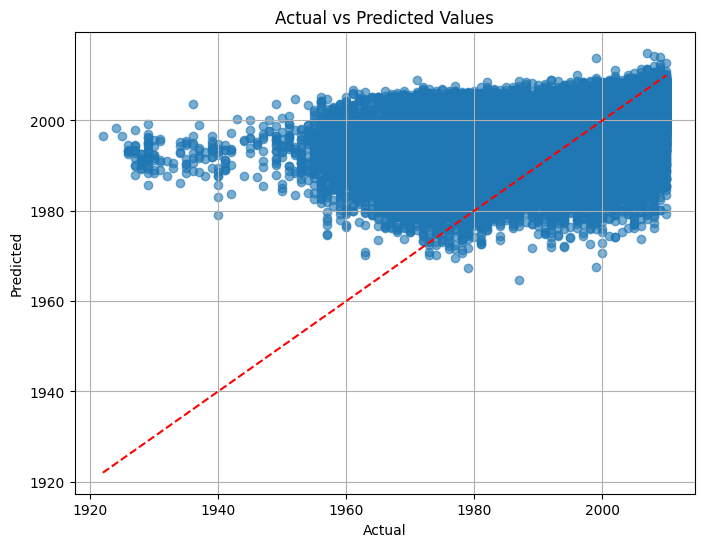

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Evaluasi Regresi ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


=== Evaluasi Regresi ===
Mean Squared Error (MSE): 77.6729
Mean Absolute Error (MAE): 5.5899
R² Score: 0.3456
